By Kian Shahi

### Describe the Data set :
#### link to dataset:

This anime.csv countains information regarding various animes, their genres, ratings, etc.
Explanations regarding the process is commented.


In [189]:
#code to import packages, open and load the dataset
#data cleaning (if required)
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#load file and inspect first 5 rows
anime = pd.read_csv('anime.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [2]:
#checking for null values and dtypes 
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [3]:
anime.tail(5)

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [4]:
anime.describe()
#no outliers seem to be present

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [5]:
#We decide to drop all the rows where null values exist
anime.dropna(inplace=True)

In [6]:
#Check updated dataframe
anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


In [7]:
anime['genre'].nunique()
#Thats a lot of genres

3229

In [8]:
anime['genre'].unique()
#There seems to be a combination of genres as a single genre

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Action, Comedy, Hentai, Romance, Supernatural',
       'Hentai, Sports', 'Hentai, Slice of Life'], dtype=object)

## Question 1 : What anime is the most popular in ratings and their genre?

In [9]:
#code to answer Q1 :
#We know the highest rating received is 10 and we set that to the variable highest_rating
highest_rating = anime['rating'].max()
#We then print the highest_rating
highest_rating

10.0

In [10]:
#Now we can filter the dataset to receive only the row/s where rating is equal to 10.0
best_anime = anime[anime['rating'] == highest_rating]
#We print the best_anime
best_anime

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.0,13


### The highest rated anime is Taka no Tsume 8: Yoshida-kun no X-Files and it is a movie within the Comedy, Parody genre.


In [11]:
anime.sort_values('rating', ascending=False)

#Second and third place are Spoon-hime no Swing Kitchen and Mogura no Motoro

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
...,...,...,...,...,...,...,...
8056,413,Hametsu no Mars,"Horror, Sci-Fi",OVA,1,2.37,27557
8057,13405,Utsu Musume Sayuri,"Comedy, Dementia",OVA,1,2.14,4047
8058,3287,Tenkuu Danzai Skelter+Heaven,"Mecha, Sci-Fi",OVA,1,2.00,7680
12258,20007,Hi Gekiga Ukiyoe Senya Ichiya,"Action, Hentai",Movie,1,1.92,129


## Question 2 : Which anime has the most episodes?

In [58]:
#code to answer Q2 : 

In [ ]:
#There are "Unknown" values present in the original data frame that we forgot to remove.

In [138]:
#It seems that unknown is the only string so we will remove those rows from the dataframe
anime_with_episodes = anime[anime['episodes'] != 'Unknown']

In [158]:
#Now we convert the column episode datatype to integer
anime_with_episodes['episodes'].astype('int').sort_values(ascending=False)

6296     1818
929      1787
9243     1565
5360     1471
6580     1428
         ... 
6404        1
6403        1
6401        1
6400        1
12293       1
Name: episodes, Length: 11830, dtype: int64

In [160]:
row = anime_with_episodes.loc[6296]
row

anime_id                    12393
name                   Oyako Club
genre       Comedy, Slice of Life
type                           TV
episodes                     1818
rating                       6.18
members                       160
Name: 6296, dtype: object

In [169]:
#checking the updated dataframe
anime_with_episodes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11830 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11830 non-null  int64  
 1   name      11830 non-null  object 
 2   genre     11830 non-null  object 
 3   type      11830 non-null  object 
 4   episodes  11830 non-null  object 
 5   rating    11830 non-null  float64
 6   members   11830 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 997.4+ KB


### The anime with the most episodes is Oyako Club with an episode count of 1818 recorded.

## Question 3 : 3. Which genre has the highest and lowest average rating?

In [167]:
mean_rating_per_genre = anime_with_episodes.groupby('genre')['rating'].mean()
mean_rating_per_genre.sort_values(ascending=False)

genre
Action, Adventure, Drama, Fantasy, Magic, Military, Shounen    9.26
Drama, Fantasy, Romance, Slice of Life, Supernatural           9.06
Drama, School, Shounen                                         9.05
Action, Drama, Mecha, Military, Sci-Fi, Super Power            8.98
Adventure, Drama, Supernatural                                 8.93
                                                               ... 
Action, Demons, Seinen, Super Power                            3.32
Kids, Mecha                                                    3.26
Action, Adventure, Sci-Fi, Space, Super Power                  3.25
Dementia, Kids                                                 3.21
Comedy, Dementia, Fantasy, Horror, Music, Parody               2.55
Name: rating, Length: 3217, dtype: float64

### The genre with the highest average rating is the combination of 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen.
### The genre with the lowest average rating is the combination of 'Comedy, Dementia, Fantasy, Horror, Music, Parody.

## Question 4 : Is there an association between anime type and anime ratings? (Plot)

In [168]:
#code to answer Q2 :
#code for the plot
#checking the upda
anime_with_episodes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [172]:
#making sure the type column is binary
anime_with_episodes['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [175]:
anime_with_episodes['type'].nunique()

6

In [177]:
grouped_type = anime_with_episodes.groupby('type')['rating'].mean()

In [178]:
grouped_type

type
Movie      6.334486
Music      5.588665
ONA        5.640479
OVA        6.371087
Special    6.525453
TV         6.929487
Name: rating, dtype: float64

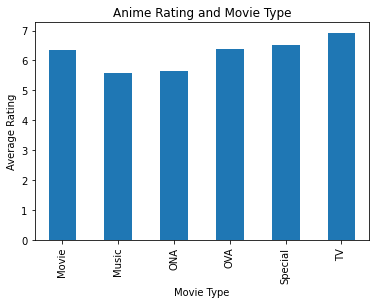

In [191]:
grouped_type.plot(kind='bar')
plt.xlabel('Movie Type')
plt.ylabel('Average Rating')
plt.title('Anime Rating and Movie Type')
plt.show()

### TV shows received the highest ratings on average, compared to music which seemed to receive the lowest ratings on average.